Let's study the possibility of extraction of CFFs from simulated data, and in particular how to get reliable error bands, using the so-called closure tests, using the NeuralModel with dispersion relation.

# Initializations

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import gepard as g
import gepard.plots as gplots
from gepard.fits import GLO15new, AUTIpts, ALUIpts
print('Gepard version = {}'.format(g.__version__))

Gepard version = 0.9.11b0


In [3]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

`torch` branch works only with Neural models, but we want to generate simulated
data with KM and GK models. So we take `master` Gepard branch, rename
`gepard -> gmaster` in 3 places in `setup.py` and `setup.cfg`, and by
`pip install -e .` we install 
official Gepard package under the alternative name `gmaster`.

In [4]:
import gmaster as gm  # need KM15 for simulated data
from gmaster.fits import par_KM15

In [5]:
angle = np.pi/4  # simplification instead of harmonics

In [6]:
## Where stuff goes
DIR = '/Users/higuera-admin/Documents/Programs/ldrdgff/Analysis/Results'

# Models for generation of artificial data

We define KM15 model, but for starters we kill all CFFs, save `ImH`.

In [7]:
class KM15(gm.eff.KellyEFF, gm.gpd.PWNormGPD, gm.cff.HybridFreePoleCFF, gm.dvcs.BM10tw2):
    
    def ReH(self, pt):
        # kills ReH
        return 0

th_KM15_ImH = KM15()
th_KM15_ImH.parameters.update(par_KM15)
th_KM15_ImH.parameters.update({'C':0, 'trv':0, 'rpi':0})  # kills ReE, ImHt, ReHt, ReEt
th_KM15_ImH.name = 'KM15_ImH'

In [8]:
for cff in th_KM15_ImH.allCFFs:
    print('{} = {}'.format(cff, th_KM15_ImH.predict(g.dset[101][0], observable=cff)))

ImH = 6.744321761721329
ReH = 0
ImE = 0.0
ReE = 0.0
ImHt = 0.0
ReHt = 0.0
ImEt = 0.0
ReEt = 0.0


**Second** model has two non-zero CFFs: ImH and ImHt

In [9]:
class KM15b(gm.eff.KellyEFF, gm.gpd.PWNormGPD, gm.cff.HybridFreePoleCFF, gm.dvcs.BM10tw2):
    
    def ReH(self, pt):
        # kills ReH
        return 0
    
    def ReHt(self, pt):
        # kills ReH
        return 0

th_KM15_ImHHt = KM15b()
th_KM15_ImHHt.parameters.update(par_KM15)
th_KM15_ImHHt.parameters.update({'C':0, 'rpi':0}) 
th_KM15_ImHHt.name = 'KM15_ImH_ImHt'

In [10]:
for cff in th_KM15_ImHHt.allCFFs:
    print('{} = {}'.format(cff, th_KM15_ImHHt.predict(g.dset[101][0], observable=cff)))

ImH = 6.744321761721329
ReH = 0
ImE = 0.0
ReE = 0.0
ImHt = 2.436634567882741
ReHt = 0
ImEt = 0.0
ReEt = 0.0


**Third** model has three non-zero CFFs: ImH, ReE and ImHt

In [11]:
class KM15c(gm.eff.KellyEFF, gm.gpd.PWNormGPD, gm.cff.HybridFreePoleCFF, gm.dvcs.BM10tw2):
    
    def ReH(self, pt):
        # kills ReH
        return 0
    
    def ReHt(self, pt):
        # kills ReH
        return 0

th_KM15_3 = KM15c()
th_KM15_3.parameters.update(par_KM15)
th_KM15_3.parameters.update({'rpi':0}) 
th_KM15_3.name = 'KM15_3'

In [12]:
for cff in th_KM15_3.allCFFs:
    print('{} = {}'.format(cff, th_KM15_3.predict(g.dset[101][0], observable=cff)))

ImH = 6.744321761721329
ReH = 0
ImE = 0.0
ReE = 2.3912295942715778
ImHt = 2.436634567882741
ReHt = 0
ImEt = 0.0
ReEt = 0.0


**Fourth** model has four non-zero CFFs: ImH, ReH, ReE and ImHt

In [13]:
class KM15d(gm.eff.KellyEFF, gm.gpd.PWNormGPD, gm.cff.HybridFreePoleCFF, gm.dvcs.BM10tw2):
    
    def ReHt(self, pt):
        # kills ReH
        return 0

th_KM15_4 = KM15d()
th_KM15_4.parameters.update(par_KM15)
th_KM15_4.parameters.update({'rpi':0}) 
th_KM15_4.name = 'KM15_4'

In [14]:
for cff in th_KM15_4.allCFFs:
    print('{} = {}'.format(cff, th_KM15_4.predict(g.dset[101][0], observable=cff)))

ImH = 6.744321761721329
ReH = -2.971259892771055
ImE = 0.0
ReE = 2.3912295942715778
ImHt = 2.436634567882741
ReHt = 0
ImEt = 0.0
ReEt = 0.0


In [15]:
class KM15e(gm.eff.KellyEFF, gm.gpd.PWNormGPD, gm.cff.HybridFreePoleCFF, gm.dvcs.BM10tw2):
    
    def ImH(self, pt):
        return 0
    
    def ReH(self, pt):
        return 0

th_KM15_ReE = KM15e()
th_KM15_ReE.parameters.update(par_KM15)
th_KM15_ReE.parameters.update({'trv':0, 'rpi':0})  # kills ReE, ImHt, ReHt, ReEt
th_KM15_ReE.name = 'KM15_ReE'

In [16]:
for cff in th_KM15_ReE.allCFFs:
    print('{} = {}'.format(cff, th_KM15_ReE.predict(g.dset[101][0], observable=cff)))

ImH = 0
ReH = 0
ImE = 0.0
ReE = 2.3912295942715778
ImHt = 0.0
ReHt = 0.0
ImEt = 0.0
ReEt = 0.0


In [17]:
class KM15f(gm.eff.KellyEFF, gm.gpd.PWNormGPD, gm.cff.HybridFreePoleCFF, gm.dvcs.BM10tw2):
    
    def ReH(self, pt):
        return 0

th_KM15_2 = KM15f()
th_KM15_2.parameters.update(par_KM15)
th_KM15_2.parameters.update({'trv':0, 'rpi':0})  # kills ReE, ImHt, ReHt, ReEt
th_KM15_2.name = 'KM15_ImH+ReE'

In [18]:
for cff in th_KM15_2.allCFFs:
    print('{} = {}'.format(cff, th_KM15_2.predict(g.dset[101][0], observable=cff)))

ImH = 6.744321761721329
ReH = 0
ImE = 0.0
ReE = 2.3912295942715778
ImHt = 0.0
ReHt = 0.0
ImEt = 0.0
ReEt = 0.0


**Model** with five non-zero CFFs: ImH, ReH, ImE, ReE and ImHt

In [19]:
class KM15g(gm.eff.KellyEFF, gm.gpd.PWNormGPD, gm.cff.HybridFreePoleCFF, gm.dvcs.BM10tw2):
    
    def ReHt(self, pt):
        # kills ReH
        return 0
    
    def ImE(self, pt):
        '''Fake ImE, just made up'''
        return 0.5 * self.ImH(pt)

th_KM15_5 = KM15g()
th_KM15_5.parameters.update(par_KM15)
th_KM15_5.parameters.update({'rpi':0}) 
th_KM15_5.name = 'KM15_4'

In [20]:
for cff in th_KM15_5.allCFFs:
    print('{} = {}'.format(cff, th_KM15_5.predict(g.dset[101][0], observable=cff)))

ImH = 6.744321761721329
ReH = -2.971259892771055
ImE = 3.3721608808606645
ReE = 2.3912295942715778
ImHt = 2.436634567882741
ReHt = 0
ImEt = 0.0
ReEt = 0.0


## Relative prefactors

In [21]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(angle),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='AC')
        pt.id = 4001
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_ReE.predict(pt)
        pt.err = abs(0.1 * pt.val) + 0.0002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset = g.DataSet(mockset)

In [22]:
th = th_KM15_ImH

In [23]:
prefE = np.array([(-pt.t/4/g.constants.Mp2)*th.F2(pt)/th.F1(pt) for pt in mockset])

In [24]:
prefE.mean(), prefE.std()

(np.float64(0.1221725260041906), np.float64(0.04794123554349669))

In [25]:
prefHt = np.array([(pt.xB/2)*(th.F1(pt)+th.F2(pt))/th.F1(pt) for pt in mockset])

In [26]:
prefHt.mean(), prefHt.std()

(np.float64(0.21777982599214343), np.float64(0.07044703031409276))

# Simulation - XLU only - ImH and D - xB and t-dep - noise

In [27]:
mockset = []
for xB in np.linspace(0.1, 0.25, 4):
    for tm in np.linspace(0.1, 0.5, 6):
        pt = g.DataPoint(xB=xB, t=-tm, Q2=torch.tensor(2.), phi=torch.tensor(0.3),
                      process='ep2epgamma', exptype='fixed target', frame='Trento',
                      in1energy=12., in1charge=-1, in1polarization=+1,
                      observable='XLU')
        pt.id = 4001
        pt.year = 2023
        pt.collaboration = 'mock'
        pt.reference = 'mock'
        pt.val = th_KM15_ImH.predict(pt)
        pt.err = 0.1 * pt.val + 0.0002
        pt.val = pt.val + np.random.normal(0, pt.err, 1)[0]  # noise
        mockset.append(pt)
mockset = g.DataSet(mockset)

In [28]:
BSD = mockset.df()

In [29]:
# Bins can be defined as ranges within the following limiting values:
tmlims = [0, 0.08, 0.14, 0.22, 0.3, 0.38, 0.46, 0.54]
xilims = [0, 0.04, 0.07, 0.1, 0.13, 0.15, 0.17, 0.19, 0.21]

Text(0, 0.5, '$-t\\quad[{\\rm GeV}^2]$')

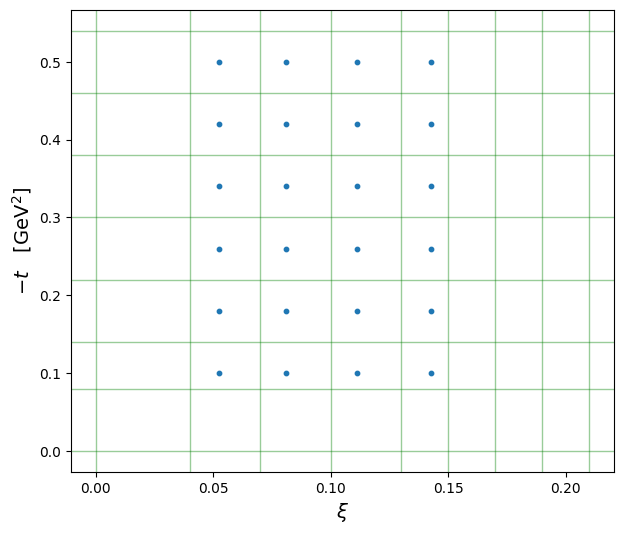

In [30]:
fig, ax = plt.subplots(figsize=[7,6])
ax.scatter(BSD.xi, BSD.tm, s=10)
for tm in tmlims:
    ax.axhline(tm, color='g', linewidth=1, alpha=0.4)
for xi in xilims:
    ax.axvline(xi, color='g', linewidth=1, alpha=0.4)
ax.set_xlabel(r'$\xi$', fontsize=14)
ax.set_ylabel(r'$-t\quad[{\rm GeV}^2]$', fontsize=14)

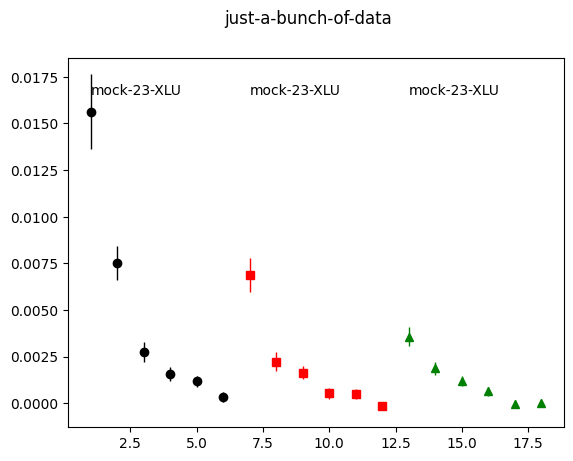

In [31]:
fig = gplots.jbod(points=[mockset[6:12], mockset[12:18], mockset[18:24]] )#fig.savefig('{}/mock1.pdf'.format(DIR))

In [32]:
mockset[6].xB, mockset[12].xB, mockset[18].xB

(np.float64(0.15), np.float64(0.2), np.float64(0.25))

In [33]:
import torch.nn as nn
class CustomNetwork(nn.Module):
    def __init__(self):
        super(CustomNetwork, self).__init__()

        # Define the layers for the network
        self.n1 = nn.Linear(2, 20)  # 2 input features, 12 hidden units
        self.n2 = nn.Linear(20, 25)  # 12 hidden units, 17 hidden units
        self.n3 = nn.Linear(25, 1)  # 7 hidden units, 1 output features
        
        self.n1p = nn.Linear(1, 20)  # 2 input features, 12 hidden units
        self.n2p = nn.Linear(20, 25)  # 12 hidden units, 17 hidden units
        self.n3p = nn.Linear(25, 1)  # 17 hidden units, 1 output features

    def forward(self, x):
        
       
        x0 = x
        
        # Build Im network
        x = torch.relu(self.n1(x0))
        x = torch.relu(self.n2(x))
        output1 = self.n3(x)
        
        # Build D network
        # build the input tensor
        x0_1 = torch.cat((x0[:,1].unsqueeze(1),), dim=0)
       
        x2 = torch.relu(self.n1p(x0_1))
        x2 = torch.relu(self.n2p(x2))
        output2 = self.n3p(x2)
        
        #concatenate outputs
        output = torch.cat((output1, output2), dim=1)
       
        return output 

In [34]:
class NNTest_DR(g.model.NeuralModel_DR, g.eff.KellyEFF, g.dvcs.BM10tw2, g.cff.DispersionCFF):
    
    def build_net(self):
        '''Overriding the default architecture and optimizer'''
        nn_model = CustomNetwork()
        optimizer = torch.optim.Rprop(nn_model.parameters(),
                lr=0.01)
        return nn_model, optimizer
    
    def subtraction(self, pt): #This should use the NN, the real part will be calculated by the CFF_Dispersion methods
        """Subtraction constant."""
        #refer to the location of D in output layer (defined in the next cell)
        return self.cffs(1, pt, xi)
    
    def ImH(self, pt, xi=0) -> float:
        """Return Im(CFF H) for kinematic point."""
        #refer to the location of Im H in output layer (defined in the next cell)
        return self.cffs(0, pt, xi)
    
    def ImE(self, pt, xi=0):
        """Return Im(CFF E) for kinematic point."""
        return self.zero(pt)
    
    def ImHt(self, pt, xi=0):
        """Return Im(CFF Ht) for kinematic point."""
        return self.zero(pt)
    
    def ImEt(self, pt, xi=0):
        """Return Im(CFF Et) for kinematic point."""
        return self.zero(pt)

In [35]:
th = NNTest_DR(output_layer=['ImH', 'D'])
th.name = 'fit'

In [36]:
#f = g.fitter.NeuralFitter(mockset, th, nnets=10, nbatch=50, batchlen=5, regularization='L2', lx_lambda=0.001)
f = g.fitter.NeuralFitter(mockset, th, nnets=10, nbatch=50, batchlen=2, regularization='L2', lx_lambda=0.001)
f.fit()

/Users/higuera-admin/Documents/Programs/ldrdgff/gepard/src/gepard/model.py:399: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = self.standardize(torch.tensor(input_layer, dtype=torch.float32),



Epoch   2: train error = 30.6973 test error = 27.7025 -
Epoch   4: train error = 29.4077 test error = 30.1552 +
Epoch   6: train error = 28.7576 test error = 31.5026 +
Epoch   8: train error = 28.0486 test error = 24.8434 -
Epoch  10: train error = 27.3325 test error = 22.0530 -
Epoch  12: train error = 26.6437 test error = 21.1099 -
Epoch  14: train error = 26.3873 test error = 20.7104 -
Epoch  16: train error = 26.1994 test error = 19.9814 -
Epoch  18: train error = 26.1799 test error = 20.1658 +
Epoch  20: train error = 26.1161 test error = 19.8146 -
Epoch  22: train error = 26.0590 test error = 19.8417 +
Epoch  24: train error = 26.0302 test error = 19.8247 +
Epoch  26: train error = 26.0168 test error = 19.7841 -
Epoch  28: train error = 26.0136 test error = 19.7100 -
Epoch  30: train error = 26.0120 test error = 19.8333 +
Epoch  32: train error = 26.0092 test error = 19.6126 -
Epoch  34: train error = 26.0075 test error = 19.6235 +
Epoch  36: train error = 26.0071 test error = 1

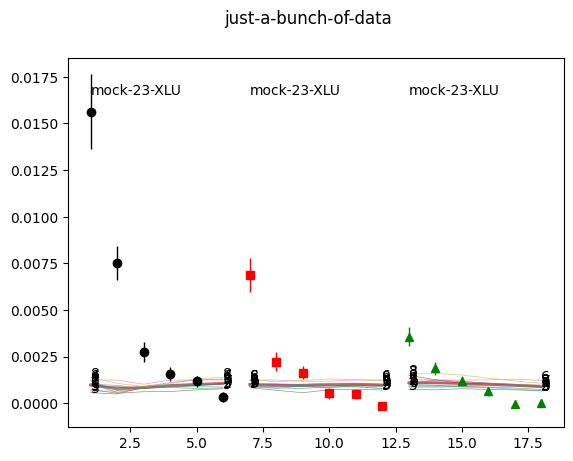

In [37]:
fig = gplots.jbod(points=[mockset[6:12], mockset[12:18], mockset[18:24]], lines=[th], mesh=th)

In [38]:
f = g.fitter.NeuralFitter(mockset, th, nnets=10, nbatch=50, batchlen=2, regularization='L1', lx_lambda=0.001)
f.fit()


Epoch   2: train error = 37.5090 test error = 23.4188 -
Epoch   4: train error = 36.3320 test error = 21.4499 -
Epoch   6: train error = 34.9510 test error = 20.0347 -
Epoch   8: train error = 33.1360 test error = 18.5700 -
Epoch  10: train error = 31.8251 test error = 19.3013 +
Epoch  12: train error = 31.3906 test error = 18.6191 +
Epoch  14: train error = 31.4063 test error = 16.9970 -
Epoch  16: train error = 30.8693 test error = 17.8538 +
Epoch  18: train error = 30.7037 test error = 17.2658 +
Epoch  20: train error = 30.5669 test error = 16.7949 -
Epoch  22: train error = 30.4887 test error = 17.3714 +
Epoch  24: train error = 30.4642 test error = 16.8832 +
Epoch  26: train error = 30.4301 test error = 16.8583 +
Epoch  28: train error = 30.4153 test error = 16.9624 +
Epoch  30: train error = 30.3845 test error = 16.7838 -
Epoch  32: train error = 30.3714 test error = 16.6438 -
Epoch  34: train error = 30.3537 test error = 16.5762 -
Epoch  36: train error = 30.3396 test error = 1

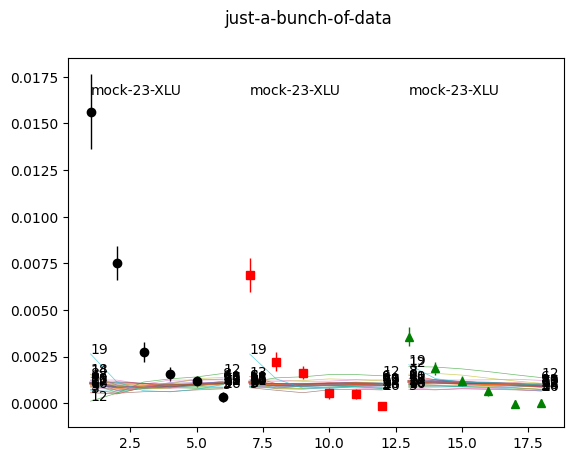

In [39]:
fig = gplots.jbod(points=[mockset[6:12], mockset[12:18], mockset[18:24]], lines=[th], mesh=th)

In [40]:
f = g.fitter.NeuralFitter(mockset, th, nnets=10, nbatch=50, batchlen=2, regularization=None, lx_lambda=0.001)
f.fit()


Epoch   2: train error = 32.2525 test error = 30.6446 -
Epoch   4: train error = 27.5703 test error = 70.9677 +
Epoch   6: train error = 25.7205 test error = 79.4758 +
Epoch   8: train error = 23.9271 test error = 40.4060 +
Epoch  10: train error = 22.8376 test error = 41.7123 +
Epoch  12: train error = 21.4900 test error = 35.9210 +
No improvement for 5 batches. Stopping early.
Net 0 --> test_err = 30.64464569091797

Epoch   2: train error = 28.5951 test error = 31.7263 -
Epoch   4: train error = 26.8878 test error = 31.4785 -
Epoch   6: train error = 24.7297 test error = 30.7228 -
Epoch   8: train error = 23.5379 test error = 31.0675 +
Epoch  10: train error = 23.0305 test error = 31.2994 +
Epoch  12: train error = 22.4522 test error = 32.6760 +
Epoch  14: train error = 22.1492 test error = 33.6265 +
Epoch  16: train error = 22.0020 test error = 32.7152 +
No improvement for 5 batches. Stopping early.
Net 1 --> test_err = 30.72281265258789

Epoch   2: train error = 41.0352 test error

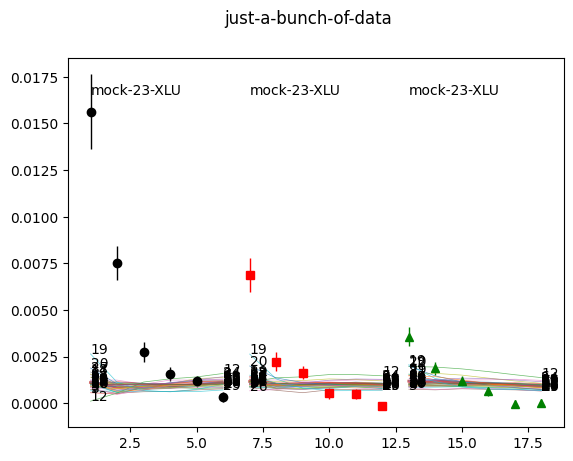

In [41]:
fig = gplots.jbod(points=[mockset[6:12], mockset[12:18], mockset[18:24]], lines=[th], mesh=th)

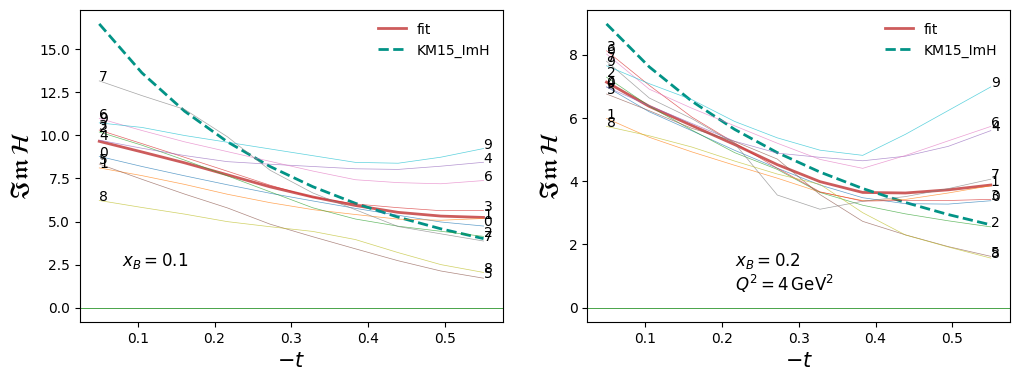

In [51]:
fig = gplots.CFFt(cffs=['ImH'], lines=[th, th_KM15_ImH], mesh=th)

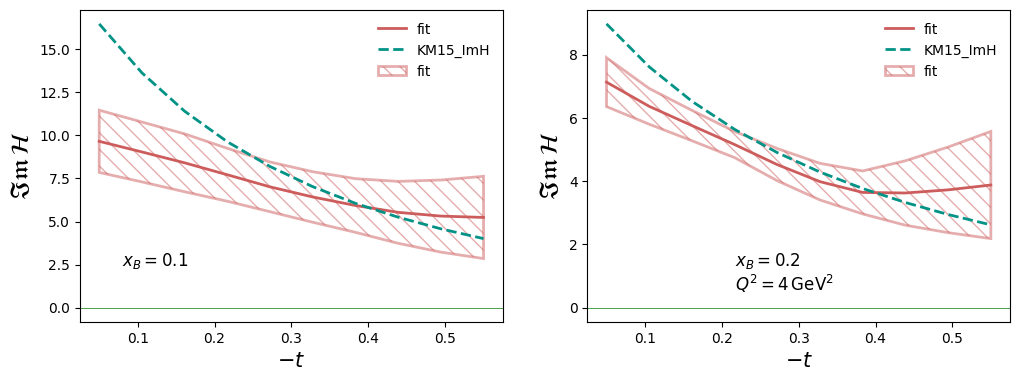

In [52]:
fig = gplots.CFFt(cffs=['ImH'], lines=[th, th_KM15_ImH], bands=[th])

# XLU CLAS data only - ImH and D outputs - xB and t-dep - noise

In [42]:
fitpoints = g.dset[101]
g.describe_data(fitpoints)

npt x obs     collab  FTn    id  ref.        
----------------------------------------------
48 x XLUw    CLAS    -1     101 arXiv:1504.02009
----------------------------------------------
TOTAL = 48


In [43]:
data = g.dset[101]
BSD = data.df()  # CLAS 2015

In [44]:
# Bins can be defined as ranges within the following limiting values:
tmlims = [0, 0.13, 0.18, 0.22, 0.3, 0.4, 0.5]
xilims = [0, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21, 0.23, 0.26]

Text(0, 0.5, '$-t\\quad[{\\rm GeV}^2]$')

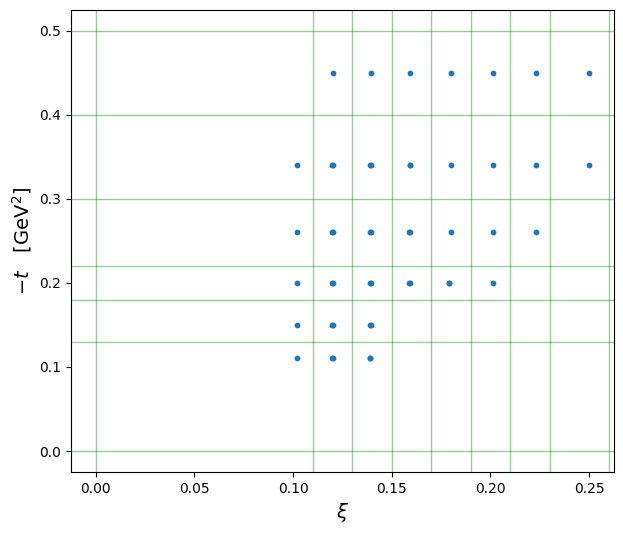

In [45]:
fig, ax = plt.subplots(figsize=[7,6])
ax.scatter(BSD.xi, BSD.tm, s=10)
for tm in tmlims:
    ax.axhline(tm, color='g', linewidth=1, alpha=0.4)
for xi in xilims:
    ax.axvline(xi, color='g', linewidth=1, alpha=0.4)
ax.set_xlabel(r'$\xi$', fontsize=14)
ax.set_ylabel(r'$-t\quad[{\rm GeV}^2]$', fontsize=14)

In [46]:
import torch.nn as nn
class CustomNetwork(nn.Module):
    def __init__(self):
        super(CustomNetwork, self).__init__()

        # Define the layers for the network
        self.n1 = nn.Linear(2, 20)  # 2 input features, 12 hidden units
        self.n2 = nn.Linear(20, 25)  # 12 hidden units, 17 hidden units
        self.n3 = nn.Linear(25, 1)  # 7 hidden units, 1 output features
        
        self.n1p = nn.Linear(1, 20)  # 2 input features, 12 hidden units
        self.n2p = nn.Linear(20, 25)  # 12 hidden units, 17 hidden units
        self.n3p = nn.Linear(25, 1)  # 17 hidden units, 1 output features

    def forward(self, x):
        
       
        x0 = x
        
        # Build Im network
        x = torch.relu(self.n1(x0))
        x = torch.relu(self.n2(x))
        output1 = self.n3(x)
        
        # Build D network
        # build the input tensor
        x0_1 = torch.cat((x0[:,1].unsqueeze(1),), dim=0)
       
        x2 = torch.relu(self.n1p(x0_1))
        x2 = torch.relu(self.n2p(x2))
        output2 = self.n3p(x2)
        
        #concatenate outputs
        output = torch.cat((output1, output2), dim=1)
       
        return output 

In [47]:
class NNTest_DR(g.model.NeuralModel_DR, g.eff.KellyEFF, g.dvcs.BMK, g.cff.DispersionCFF):
    
    def build_net(self):
        '''Overriding the default architecture and optimizer'''
        nn_model = CustomNetwork()
        optimizer = torch.optim.Rprop(nn_model.parameters(),
                lr=0.01)
        return nn_model, optimizer
    
    def subtraction(self, pt): #This should use the NN, the real part will be calculated by the CFF_Dispersion methods
        """Subtraction constant."""
        #refer to the location of D in output layer (defined in the next cell)
        return self.cffs(1, pt, xi)
    
    def ImH(self, pt, xi=0) -> float:
        """Return Im(CFF H) for kinematic point."""
        #refer to the location of Im H in output layer (defined in the next cell)
        return self.cffs(0, pt, xi)
    
    def ImE(self, pt, xi=0):
        """Return Im(CFF E) for kinematic point."""
        return self.zero(pt)
    
    def ImHt(self, pt, xi=0):
        """Return Im(CFF Ht) for kinematic point."""
        return self.zero(pt)
    
    def ImEt(self, pt, xi=0):
        """Return Im(CFF Et) for kinematic point."""
        return self.zero(pt)

In [48]:
th = NNTest_DR(output_layer=['ImH', 'D'])
th.name = 'fit'

In [49]:
f = g.fitter.NeuralFitter(fitpoints, th, nnets=10, nbatch=50, batchlen=2, regularization=None)
f.fit()


Epoch   2: train error = 8.3057 test error = 8.3224 -
Epoch   4: train error = 6.9466 test error = 6.3120 -
Epoch   6: train error = 4.8457 test error = 3.2859 -
Epoch   8: train error = 1.8574 test error = 1.1327 -
Epoch  10: train error = 1.1585 test error = 0.9673 -
Epoch  12: train error = 0.9696 test error = 0.7420 -
Epoch  14: train error = 0.9568 test error = 1.0914 +
Epoch  16: train error = 0.8535 test error = 0.7334 -
Epoch  18: train error = 0.8908 test error = 0.7873 +
Epoch  20: train error = 0.8486 test error = 0.8778 +
Epoch  22: train error = 0.8337 test error = 0.7657 +
Epoch  24: train error = 0.8252 test error = 0.7948 +
Epoch  26: train error = 0.8149 test error = 0.7784 +
No improvement for 5 batches. Stopping early.
Net 0 --> test_err = 0.7333943318279764

Epoch   2: train error = 8.0668 test error = 9.7535 -
Epoch   4: train error = 6.8215 test error = 7.8106 -
Epoch   6: train error = 4.8134 test error = 4.4767 -
Epoch   8: train error = 1.9832 test error = 1.0

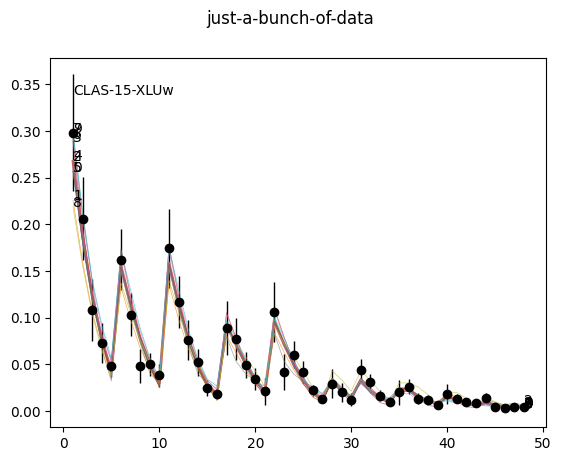

In [50]:
fig = gplots.jbod(points=fitpoints, lines=[th], mesh=th)